<a href="https://colab.research.google.com/github/hyuntaedo/Deep_learning/blob/main/Facebook_Prophet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from fbprophet import Prophet
import pandas as pd

In [ ]:
!pip install -U finance-datareader

In [ ]:
import FinanceDataReader as f

f.DataReader('005930')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-06-21,1251,1256,1217,1222,86490,NaN
1997-06-23,1220,1233,1209,1224,140090,0.001637
1997-06-24,1233,1247,1215,1240,136590,0.013072
1997-06-25,1242,1249,1224,1242,572440,0.001613
1997-06-26,1225,1267,1224,1251,149640,0.007246
...,...,...,...,...,...,...
2021-06-21,79700,80000,79600,79900,16063340,-0.007453
2021-06-22,80200,80300,79900,80000,11773365,0.001252
2021-06-23,80500,80600,79900,80100,13856548,0.001250


In [ ]:
samsung_stock = f.DataReader('005930')
samsung_stock

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-06-21,1251,1256,1217,1222,86490,NaN
1997-06-23,1220,1233,1209,1224,140090,0.001637
1997-06-24,1233,1247,1215,1240,136590,0.013072
1997-06-25,1242,1249,1224,1242,572440,0.001613
1997-06-26,1225,1267,1224,1251,149640,0.007246
...,...,...,...,...,...,...
2021-06-21,79700,80000,79600,79900,16063340,-0.007453
2021-06-22,80200,80300,79900,80000,11773365,0.001252
2021-06-23,80500,80600,79900,80100,13856548,0.001250


In [ ]:
samsung_stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change'], dtype='object')

In [ ]:
samsung_stock.index

DatetimeIndex(['1997-06-21', '1997-06-23', '1997-06-24', '1997-06-25',
               '1997-06-26', '1997-06-27', '1997-06-28', '1997-06-30',
               '1997-07-01', '1997-07-02',
               ...
               '2021-06-14', '2021-06-15', '2021-06-16', '2021-06-17',
               '2021-06-18', '2021-06-21', '2021-06-22', '2021-06-23',
               '2021-06-24', '2021-06-25'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

In [ ]:
samsung_stock['ds'] = samsung_stock.index
samsung_stock['y'] = samsung_stock['Close']
samsung_stock

,Open,High,Low,Close,Volume,Change,ds,y
Date,,,,,,,,
1997-06-21,1251,1256,1217,1222,86490,NaN,1997-06-21,1222
1997-06-23,1220,1233,1209,1224,140090,0.001637,1997-06-23,1224
1997-06-24,1233,1247,1215,1240,136590,0.013072,1997-06-24,1240
1997-06-25,1242,1249,1224,1242,572440,0.001613,1997-06-25,1242
1997-06-26,1225,1267,1224,1251,149640,0.007246,1997-06-26,1251
...,...,...,...,...,...,...,...,...
2021-06-21,79700,80000,79600,79900,16063340,-0.007453,2021-06-21,79900
2021-06-22,80200,80300,79900,80000,11773365,0.001252,2021-06-22,80000
2021-06-23,80500,80600,79900,80100,13856548,0.001250,2021-06-23,80100


In [ ]:
samsung_stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'ds', 'y'], dtype='object')

In [ ]:
samsung_stock = samsung_stock.drop(['Open','High','Low','Close','Volume','Change'],axis=1)
samsung_stock

,ds,y
Date,,
1997-06-21,1997-06-21,1222
1997-06-23,1997-06-23,1224
1997-06-24,1997-06-24,1240
1997-06-25,1997-06-25,1242
1997-06-26,1997-06-26,1251
...,...,...
2021-06-21,2021-06-21,79900
2021-06-22,2021-06-22,80000
2021-06-23,2021-06-23,80100


In [ ]:
df = samsung_stock.iloc[-300:]
df

,ds,y
Date,,
2020-04-09,2020-04-09,49100
2020-04-10,2020-04-10,49250
2020-04-13,2020-04-13,48300
2020-04-14,2020-04-14,49000
2020-04-16,2020-04-16,49000
...,...,...
2021-06-21,2021-06-21,79900
2021-06-22,2021-06-22,80000
2021-06-23,2021-06-23,80100


In [ ]:
m = Prophet()

m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
predict_date = m.make_future_dataframe(periods=30,freq='D')
predict_value = m.predict(predict_date)
predict_value.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
325,2021-07-21,79646.296689,77099.005132,81892.947743,78961.711590,80448.145761,-99.870484,-99.870484,-99.870484,-99.870484,-99.870484,-99.870484,0.0,0.0,0.0,79546.426205
326,2021-07-22,79616.969261,77058.158194,81786.630761,78880.668545,80469.640223,-185.585688,-185.585688,-185.585688,-185.585688,-185.585688,-185.585688,0.0,0.0,0.0,79431.383573
327,2021-07-23,79587.641833,77046.419841,81714.890907,78795.812428,80481.053474,-178.814682,-178.814682,-178.814682,-178.814682,-178.814682,-178.814682,0.0,0.0,0.0,79408.827151
328,2021-07-24,79558.314405,77694.896199,82482.828289,78722.004020,80490.290963,394.324242,394.324242,394.324242,394.324242,394.324242,394.324242,0.0,0.0,0.0,79952.638647
329,2021-07-25,79528.986978,77463.837392,82322.542882,78599.961133,80493.520456,394.324273,394.324273,394.324273,394.324273,394.324273,394.324273,0.0,0.0,0.0,79923.311250


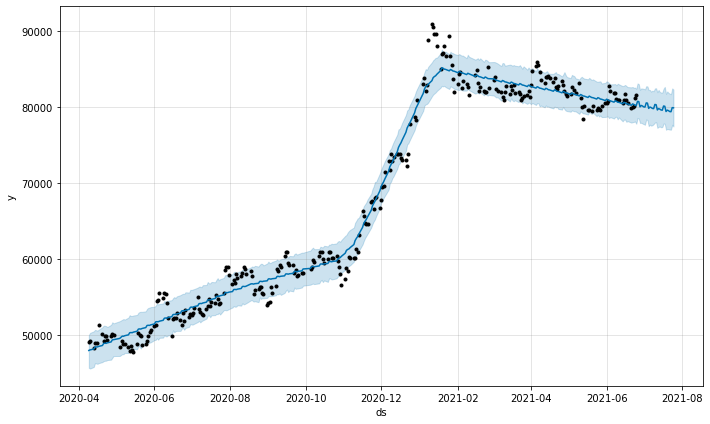

In [ ]:
plot_one = m.plot(predict_value)

In [ ]:
m = Prophet(
    interval_width = 0.3,
    yearly_seasonality=True,
    weekly_seasonality = False,
    daily_seasonality = False #주말에는 주식시장이 열리지않기때문에 값이 이상해짐
)

m.fit(df)

In [ ]:
predict_date = m.make_future_dataframe(periods=30,freq='D')
predict_value = m.predict(predict_date)
predict_value.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
325,2021-07-21,81546.328966,79408.165183,80315.958351,81541.905829,81547.826801,-1725.154917,-1725.154917,-1725.154917,-1725.154917,-1725.154917,-1725.154917,0.0,0.0,0.0,79821.174050
326,2021-07-22,81560.091186,79563.316089,80494.040679,81553.561972,81561.989649,-1589.664401,-1589.664401,-1589.664401,-1589.664401,-1589.664401,-1589.664401,0.0,0.0,0.0,79970.426785
327,2021-07-23,81573.853405,79633.930569,80580.324181,81565.241488,81576.652995,-1451.754100,-1451.754100,-1451.754100,-1451.754100,-1451.754100,-1451.754100,0.0,0.0,0.0,80122.099305
328,2021-07-24,81587.615625,79862.003291,80744.036196,81577.158672,81591.730396,-1313.647400,-1313.647400,-1313.647400,-1313.647400,-1313.647400,-1313.647400,0.0,0.0,0.0,80273.968225
329,2021-07-25,81601.377844,79916.815605,80758.191586,81589.228211,81607.140019,-1177.695938,-1177.695938,-1177.695938,-1177.695938,-1177.695938,-1177.695938,0.0,0.0,0.0,80423.681906


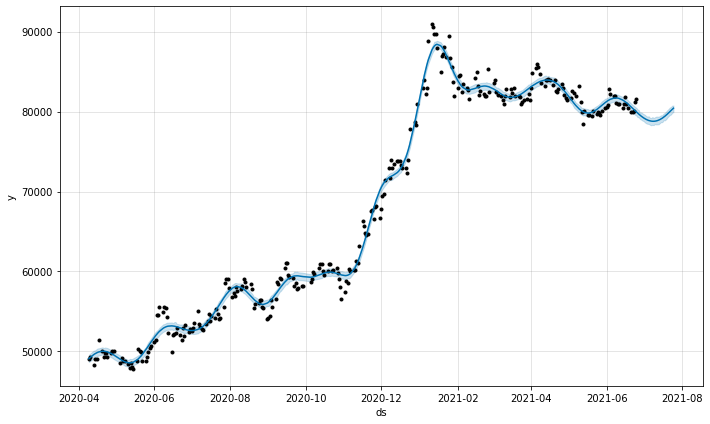

In [ ]:
plot_one = m.plot(predict_value)